# Lecture 26: Newton-Raphson Method

## Learning Objectives

By the end of this lecture, you will be able to:

1. Understand the Newton-Raphson method.
2. Implement the Newton-Raphson method to find the roots of a function.
3. Apply the Newton-Raphson method to solve nonlinear equations.

## Newton-Raphson Method

The Newton-Raphson method is an iterative technique for finding the roots of a real-valued function $f(x)$. The method starts with an initial guess $x_0$ and iteratively refines the guess using the formula:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

where $f'(x_n)$ is the derivative of the function $f(x)$ evaluated at $x_n$. The process is repeated until the difference between successive approximations is less than a specified tolerance.

## Geometric Interpretation

The Newton-Raphson method can be interpreted geometrically as follows. Given a function $f(x)$, the tangent line to the curve at the point $(x_n, f(x_n))$ is given by:

$$
y = f'(x_n)(x - x_n) + f(x_n)
$$

The intersection of this tangent line with the $x$-axis gives the next approximation $x_{n+1}$:

$$
0 = f'(x_n)(x_{n+1} - x_n) + f(x_n)
$$

Solving for $x_{n+1}$, we get:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

This is the same formula as the one derived algebraically.

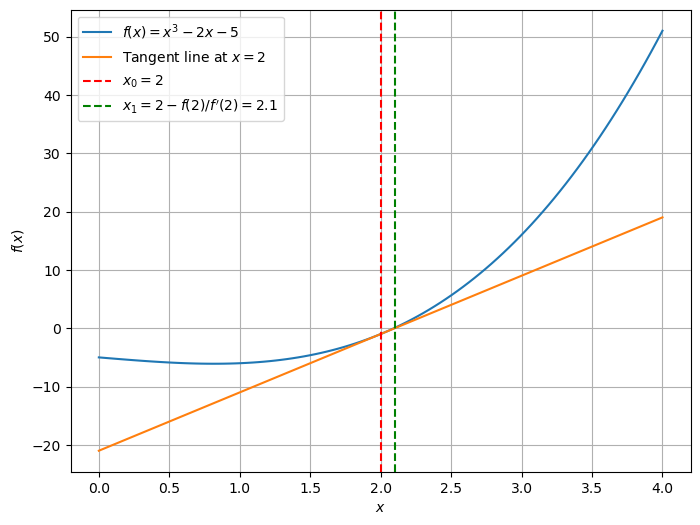

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^3 - 2x - 5
def f(x):
    return x**3 - 2*x - 5

# Define the derivative f'(x) = 3x^2 - 2
def f_prime(x):
    return 3*x**2 - 2

# Define the tangent line at x = 2
def tangent_line(x):
    return f_prime(2)*(x - 2) + f(2)

# Plot the function f(x) and the tangent line at x = 2
x = np.linspace(0, 4, 100)
y = f(x)
tangent = tangent_line(x)

# Calculate the next approximation using Newton-Raphson method
x_new = 2 - f(2) / f_prime(2)

# Plot the function and the tangent line
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$f(x) = x^3 - 2x - 5$')
plt.plot(x, tangent, label='Tangent line at $x = 2$')
plt.axvline(x=2, color='r', linestyle='--', label='$x_0 = 2$')
plt.axvline(x=x_new, color='g', linestyle='--', label='$x_1 = 2 - f(2)/f\'(2) = {:.1f}$'.format(x_new))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

## Implementation of Newton-Raphson Method

Let's implement the Newton-Raphson method in Python to find the root of a function $f(x)$. We will define the function $f(x)$ and its derivative $f'(x)$, choose an initial guess $x_0$, and iterate until the convergence criterion is met.

In [2]:
import numpy as np

def f(x):
    return x**3 - 2*x - 5

def f_prime(x):
    return 3*x**2 - 2

def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / f_prime(x)
        if np.abs(x_new - x) < tol:
            return x_new
        x = x_new
    return None

# Initial guess
x0 = 2.0

# Find the root using Newton-Raphson method
root = newton_raphson(f, f_prime, x0)
print(f"Root of the function: {root}")

Root of the function: 2.0945514815423265


In this example, we define a function $f(x) = x^3 - 2x - 5$ and its derivative $f'(x) = 3x^2 - 2$. We choose an initial guess $x_0 = 2.0$ and apply the Newton-Raphson method to find the root of the function. The result is printed as the output.

## Multivariate Newton-Raphson Method

The Newton-Raphson method can be extended to find the roots of a system of nonlinear equations. Given a system of equations $f(x) = 0$, where $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$, the Newton-Raphson method iteratively refines the guess $x_n$ using the formula:

$$
x_{n+1} = x_n - J^{-1}(x_n) f(x_n)
$$

where $J(x_n)$ is the Jacobian matrix of $f(x)$ evaluated at $x_n$. The process is repeated until the difference between successive approximations is less than a specified tolerance.

## Implementation of Multivariate Newton-Raphson Method

Let's implement the multivariate Newton-Raphson method in Python to solve a chemical equilibrium problem. Consider a chemical system with two species, A and B, in equilibrium:

$$
\text{A} \rightleftharpoons 2\text{B}
$$

with the equilibrium constant $K = 100$.

We aim to find the equilibrium concentrations of A ($[\text{A}]$) and B ($[\text{B}]$) starting from initial concentrations:

$$
[\text{A}]_0 = 1.0 \, \text{M}, \quad [\text{B}]_0 = 0.5 \, \text{M}
$$

### Equations to Solve

1. The equilibrium constant relation:

$$
K = \frac{[\text{B}]^2}{[\text{A}]}
$$

Rearrange to:

$$
f_1([\text{A}], [\text{B}]) = [\text{B}]^2 - K[\text{A}] = 0
$$

2. Conservation of mass:

$$
[\text{A}] + [\text{B}] = \text{constant (initial total)} = 1.5
$$

Rearrange to:

$$
f_2([\text{A}], [\text{B}]) = [\text{A}] + [\text{B}] - 1.5 = 0
$$

These form a nonlinear system of equations:

$$
\mathbf{F}([\text{A}], [\text{B}]) =
\begin{bmatrix}
f_1([\text{A}], [\text{B}]) \\
f_2([\text{A}], [\text{B}])
\end{bmatrix} =
\begin{bmatrix}
[\text{B}]^2 - K[\text{A}] \\
[\text{A}] + [\text{B}] - 1.5
\end{bmatrix} =
\mathbf{0}
$$

### Newton-Raphson Algorithm

1. Start with an initial guess:

$$
\mathbf{x}_0 = \begin{bmatrix} [\text{A}]_0 \\ [\text{B}]_0 \end{bmatrix} = \begin{bmatrix} 1.0 \\ 0.5 \end{bmatrix}
$$

2. At each iteration, compute:

$$
\mathbf{x}_{n+1} = \mathbf{x}_n - \mathbf{J}^{-1}(\mathbf{x}_n) \cdot \mathbf{F}(\mathbf{x}_n)
$$

where $\mathbf{J}$ is the Jacobian matrix of partial derivatives:

$$
\mathbf{J} =
\begin{bmatrix}
\frac{\partial f_1}{\partial [\text{A}]} & \frac{\partial f_1}{\partial [\text{B}]} \\
\frac{\partial f_2}{\partial [\text{A}]} & \frac{\partial f_2}{\partial [\text{B}]}
\end{bmatrix}
$$

3. Compute the partial derivatives:

$$
\frac{\partial f_1}{\partial [\text{A}]} = -100, \quad \frac{\partial f_1}{\partial [\text{B}]} = 2[\text{B}]
$$

$$
\frac{\partial f_2}{\partial [\text{A}]} = 1, \quad \frac{\partial f_2}{\partial [\text{B}]} = 1
$$

So:

$$
\mathbf{J} =
\begin{bmatrix}
-100 & 2[\text{B}] \\
1 & 1
\end{bmatrix}
$$

4. Iterate until convergence (when $\|\mathbf{F}(\mathbf{x}_n)\|$ is sufficiently small).

### Python Implementation

Here's Python code to implement this:

In [3]:
import numpy as np

# Define the functions
def F(x):
    A, B = x
    return np.array([
        B**2 - 100 * A,  # f1
        A + B - 1.5      # f2
    ])

# Define the Jacobian
def J(x):
    A, B = x
    return np.array([
        [-100, 2 * B],  # Partial derivatives of f1
        [1, 1]          # Partial derivatives of f2
    ])

# Initial guess
x0 = np.array([1.0, 0.5])

# Newton-Raphson iteration
tolerance = 1e-6
max_iter = 100
for i in range(max_iter):
    Fx = F(x0)
    Jx = J(x0)
    dx = np.linalg.solve(Jx, -Fx)  # Solve J * dx = -F
    x0 = x0 + dx
    
    if np.linalg.norm(Fx, ord=2) < tolerance:
        print(f"Converged in {i+1} iterations.")
        break
else:
    print("Did not converge.")

# Results
print(f"Equilibrium concentrations: [A] = {x0[0]:.6f}, [B] = {x0[1]:.6f}")

Converged in 4 iterations.
Equilibrium concentrations: [A] = 0.021849, [B] = 1.478151


In this code, we define the functions $f_1([\text{A}], [\text{B}])$ and $f_2([\text{A}], [\text{B}])$ and their Jacobian matrix $\mathbf{J}$. We choose an initial guess $\mathbf{x}_0 = [1.0, 0.5]$ and apply the Newton-Raphson method to solve the system of equations. The equilibrium concentrations of A and B are printed as the output. The analytical solution is $[\text{A}] = 0.02$ M and $[\text{B}] = 1.48$ M.

## Summary

In this lecture, we learned about the Newton-Raphson method for finding the roots of a function. We discussed the geometric interpretation of the method and implemented it in Python. We also extended the method to solve a system of nonlinear equations using the multivariate Newton-Raphson method.